In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet("dataset.parquet.gz")

In [3]:
languages = []
for c in df.columns:
    if c[0] == 'language':
        languages.append(c)

In [4]:
df.columns

MultiIndex([('language',                'C'),
            ('language',               'C#'),
            ('language',              'C++'),
            ('language',              'CSS'),
            ('language',              'CSV'),
            ('language',           'Cython'),
            ('language',             'Diff'),
            ('language',          'Gherkin'),
            ('language',             'HTML'),
            ('language',              'INI'),
            ('language',             'JSON'),
            ('language',       'JavaScript'),
            ('language',            'Jinja'),
            ('language',         'Markdown'),
            ('language',             'NSIS'),
            ('language',       'PostScript'),
            ('language',       'PowerShell'),
            ('language',           'Python'),
            ('language',             'Roff'),
            ('language',            'Shell'),
            ('language',             'TOML'),
            ('language',          

In [162]:
df[df["files"]<=40]

language                                               \
                            C  C# C++ CSS CSV Cython Diff Gherkin HTML INI   
black-12                  NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
thefuck-31                NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
pandas-49                 NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
youtube-dl-10             NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
keras-21                  NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
...                       ...  ..  ..  ..  ..    ...  ...     ...  ...  ..   
CRAWL-CVE-2021-33203      NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
CRAWL-CVE-2006-1512       NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
CRAWL-CVE-2014-0191       NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
CRAWL-CVE-2021-34337      NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   
CRAWL-CVE-2005-4153       NaN NaN NaN NaN NaN    NaN  NaN     NaN  NaN NaN   

                      ... purpose                   type               \
                      ...   other programming tests data markup other   
black-12              ...     1.0         1.0   2.0  NaN    NaN   1.0   
thefuck-31            ...     NaN         1.0   1.0  NaN    NaN   NaN   
pandas-49             ...     NaN         1.0   1.0  NaN    NaN   NaN   
youtube-dl-10         ...     NaN         1.0   1.0  NaN    NaN   NaN   
keras-21              ...     NaN         1.0   1.0  NaN    NaN   NaN   
...                   ...     ...         ...   ...  ...    ...   ...   
CRAWL-CVE-2021-33203  ...     NaN         NaN   4.0  NaN    NaN   NaN   
CRAWL-CVE-2006-1512   ...     NaN         NaN   NaN  NaN    NaN   NaN   
CRAWL-CVE-2014-0191   ...     NaN         NaN   NaN  NaN    NaN   NaN   
CRAWL-CVE-2021-34337  ...     NaN         NaN   NaN  NaN    NaN   NaN   
CRAWL-CVE-2005-4153   ...     NaN         NaN   NaN  NaN    NaN   NaN   

                                       files dataset  
                     programming prose                
black-12                       3   NaN   4.0     BiP  
thefuck-31                     2   NaN   2.0     BiP  
pandas-49                      2   1.0   3.0     BiP  
youtube-dl-10                  2   NaN   2.0     BiP  
keras-21                       2   NaN   2.0     BiP  
...                          ...   ...   ...     ...  
CRAWL-CVE-2021-33203           8   9.0  17.0   CRAWL  
CRAWL-CVE-2006-1512            1   NaN   1.0   CRAWL  
CRAWL-CVE-2014-0191            1   NaN   1.0   CRAWL  
CRAWL-CVE-2021-34337           2   2.0   4.0   CRAWL  
CRAWL-CVE-2005-4153            1   NaN   1.0   CRAWL  

[800 rows x 39 columns]

In [183]:
def dataset(name):
    if 'CVE' in name[:4]:
        return 'CVE'
    elif 'CRAWL' in name[:6]:
        return 'CRAWL'
    else:
        return 'BiP'
df['dataset'] = df.index.map(dataset)

df["files"] = df[languages].sum(axis=1)

# Reviewer A
Bugs to review (df_sorted[r] == 1).sum()
Files to review df_sorted[df_sorted[r] == 1]['files'].sum()
## Histogram of files


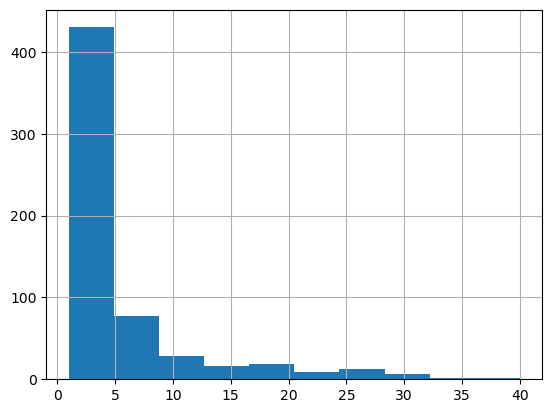

## Working packages sizes


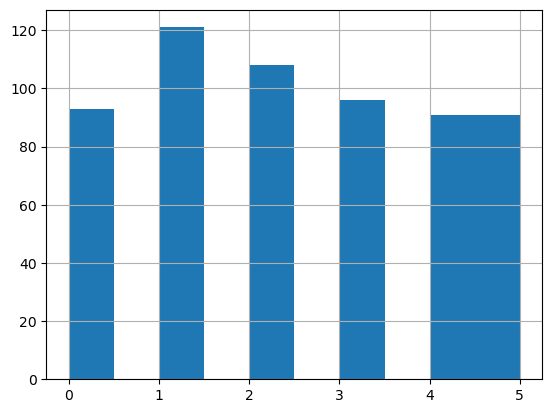

# Reviewer B
Bugs to review (df_sorted[r] == 1).sum()
Files to review df_sorted[df_sorted[r] == 1]['files'].sum()
## Histogram of files


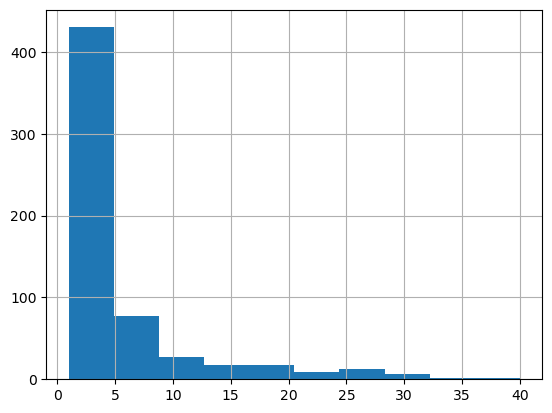

## Working packages sizes


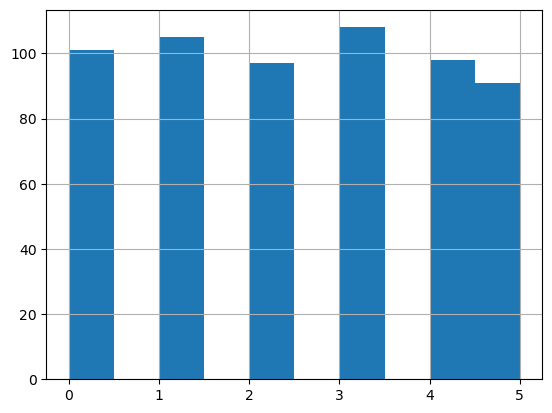

# Reviewer C
Bugs to review (df_sorted[r] == 1).sum()
Files to review df_sorted[df_sorted[r] == 1]['files'].sum()
## Histogram of files


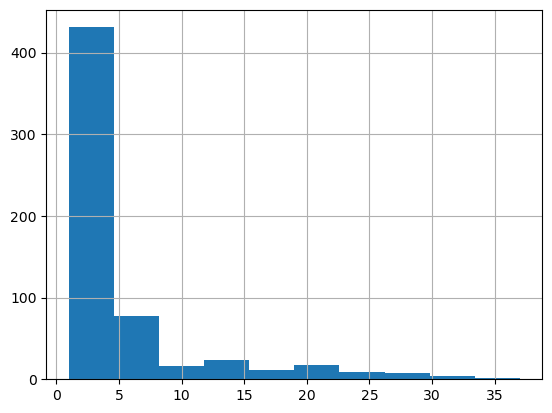

## Working packages sizes


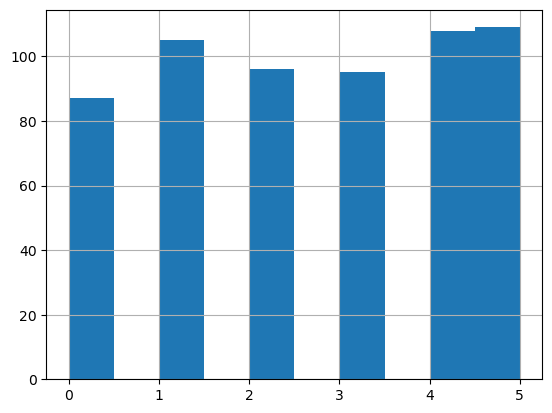

# Reviewer D
Bugs to review (df_sorted[r] == 1).sum()
Files to review df_sorted[df_sorted[r] == 1]['files'].sum()
## Histogram of files


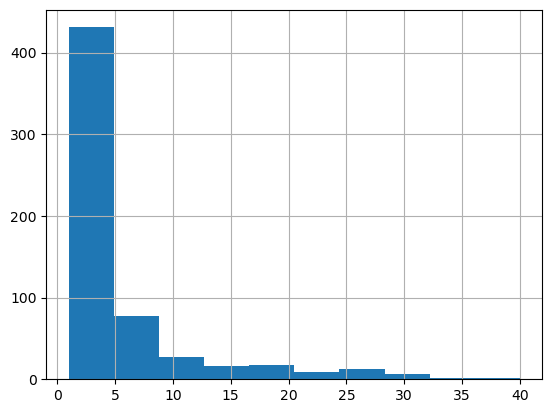

## Working packages sizes


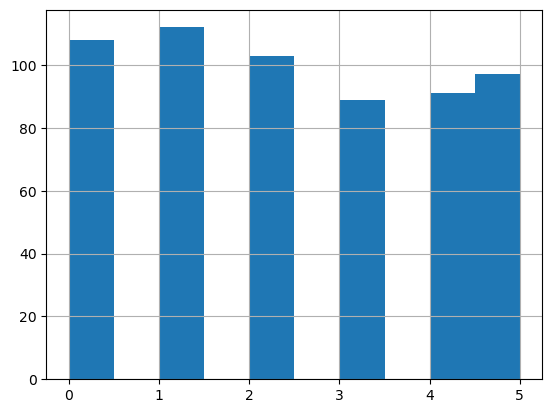

In [189]:
df_sorted = df[df["files"]<=40].sort_values(['dataset', 'files'], ascending = [False, True])
df_sorted['i'] = 1
df_sorted['i'] = df_sorted['i'].cumsum()

def assign(x, r, b):
    if ((x) % r == b) or ((x+1) % r == b) or ((x+2) % r == b):
        return 1

    return 0



df_sorted['rA'] =  df_sorted['i'].map(lambda x: assign(x,4,0))
df_sorted['rB'] =  df_sorted['i'].map(lambda x: assign(x,4,1))
df_sorted['rC'] =  df_sorted['i'].map(lambda x: assign(x,4,2))
df_sorted['rD'] =  df_sorted['i'].map(lambda x: assign(x,4,3))

for r in ['rA', 'rB', 'rC', 'rD']:
    print(f"# Reviewer {r[1]}")
    print(f"Bugs to review (df_sorted[r] == 1).sum()")
    print(f"Files to review df_sorted[df_sorted[r] == 1]['files'].sum()")
    print("## Histogram of files")
    df_sorted[df_sorted[r] == 1]['files'].hist()
    plt.show()
    
    print("## Working packages sizes")
    package = 'p' + r[1]
    df_sorted[package] = np.random.randint(0, 6, size=df_sorted.shape[0])
    df_sorted[df_sorted[r] == 1][package].hist()
    plt.show()

In [203]:
export = df_sorted[['rA', 'rB', 'rC', 'rD', 'pA', 'pB', 'pC', 'pD']]
export.columns = ['rA', 'rB', 'rC', 'rD', 'pA', 'pB', 'pC', 'pD']
export.to_json("bugs_packages.json", orient='index')


In [195]:
(df_sorted['rA'] + df_sorted['rB'] + df_sorted['rC'] + df_sorted['rD']).describe()
    

count    800.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
dtype: float64

In [201]:
df_sorted[['rA', 'rB', 'rC', 'rD', 'pA', 'pB', 'pC', 'pD']]

,rA,rB,rC,rD,pA,pB,pC,pD
,,,,,,,,
CVE-2018-6353,0,1,1,1,5,1,4,5
CVE-2019-11340,1,0,1,1,3,4,2,1
CVE-2020-35678,1,1,0,1,2,5,2,0
CVE-2021-39182,1,1,1,0,5,0,5,3
CVE-2017-15111,0,1,1,1,0,0,0,3
...,...,...,...,...,...,...,...,...
pandas-105,1,1,1,0,2,3,2,3
black-23,0,1,1,1,5,0,4,5
black-6,1,0,1,1,1,5,5,0


In [204]:
df_sorted['files'].describe()

count    800.000000
mean       5.426250
std        6.247668
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       40.000000
Name: files, dtype: float64